<a href="https://colab.research.google.com/github/sucansa/DSProjects/blob/Local-copy/Cluster%2CSVC%2CRFM%2CLGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

<font color='red'>\# TODO: fill in the below</font>

- SUCHITRA SRINIVASAN
- 20310510
- SECTION 1
- MY LIFE IN FULL
- 17TH NOV 2021

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
print(datetime.datetime.now())

2021-12-05 01:02:41.162764


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

In [ ]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")


In [ ]:
list(df1)
df1.shape
df1.info()
df1.describe().transpose()
df1.head(n=20)
df1.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [ ]:
X = df1.copy()
X = X.drop(['Income', 'SpendingScore'], axis=1)
Y = df1.copy()
Y = Y.drop(['Age','Savings'],axis=1)
X.head(10)
Y.head(10)

,Age,Savings
0,58,6559.829923
1,59,5417.661426
2,62,9258.992965
3,59,7346.334504
4,87,16869.507130
5,29,3535.514352
6,54,6878.884249
7,87,18086.287158
8,83,14783.379086
9,84,17879.558906


,Income,SpendingScore
0,77769,0.791329
1,81799,0.791082
2,74751,0.702657
3,74373,0.765680
4,17760,0.348778
5,131578,0.847034
6,76500,0.785198
7,42592,0.355290
8,34384,0.324719
9,27693,0.367063


In [ ]:
scaler = StandardScaler()
features = ['Age', 'Savings']
X[features] = scaler.fit_transform(X[features])


In [ ]:
features1 = ['Income','SpendingScore']
Y[features1] = scaler.fit_transform(Y[features1]) 

In [ ]:
X.shape
X.info()
X.describe().transpose()
X.head(10)
X.tail()

(505, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      505 non-null    float64
 1   Savings  505 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,5.672031e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Savings,505.0,-4.058360e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


,Age,Savings
0,-0.042287,-1.072467
1,-0.000821,-1.303473
2,0.123577,-0.526556
3,-0.000821,-0.913395
4,1.160228,1.012686
5,-1.244802,-1.684141
6,-0.208151,-1.007937
7,1.160228,1.258782
8,0.994363,0.590763
9,1.035829,1.216971


,Age,Savings
500,-1.286268,0.621787
501,1.409024,1.235201
502,1.284626,0.855313
503,1.326092,1.322452
504,1.243160,0.510463


In [ ]:
Y.shape
Y.info()
Y.describe().transpose()
Y.head(10)
Y.tail()

(505, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         505 non-null    float64
 1   SpendingScore  505 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


,count,mean,std,min,25%,50%,75%,max
Income,505.0,-2.638154e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-1.954432e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103


,Income,SpendingScore
0,0.062733,1.103593
1,0.174811,1.102641
2,-0.021200,0.761727
3,-0.031712,1.004705
4,-1.606165,-0.602619
5,1.559204,1.318359
6,0.027441,1.079955
7,-0.915567,-0.577512
8,-1.143838,-0.695375
9,-1.329920,-0.532121


,Income,SpendingScore
500,0.714535,-0.453557
501,-1.545704,-1.164109
502,-1.118447,-0.578054
503,-1.524929,-0.579866
504,-1.258335,-0.831890


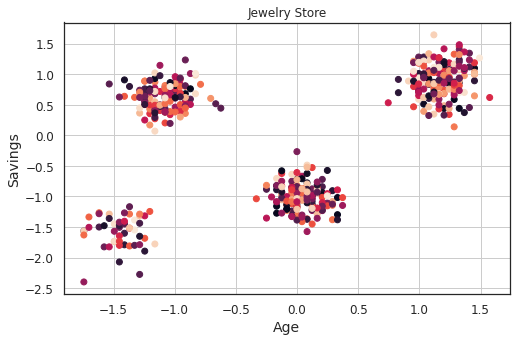

In [ ]:
rng = np.random.RandomState(0)
colors = rng.rand(505)
plt.figure();
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors);
plt.title("Jewelry Store");
plt.xlabel('Age');
plt.ylabel('Savings');


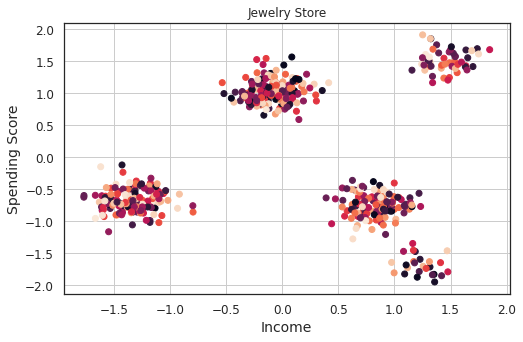

In [ ]:
plt.figure();
plt.scatter(Y.iloc[:, 0], Y.iloc[:, 1], c=colors);
plt.title("Jewelry Store");
plt.xlabel('Income');
plt.ylabel('Spending Score');

## 1.1: Clustering Algorithm #1

In [ ]:
# K Means
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)
k_means.labels_

KMeans(n_clusters=5, random_state=42)

array([1, 1, 1, 1, 0, 3, 1, 0, 4, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 4, 0, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 4, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 0, 1, 4, 4, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 4, 2, 2, 1,
       4, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 4, 4, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 4, 1, 2, 4, 1,
       0, 4, 2, 1, 0, 1, 2, 4, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 4, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       4, 4, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 4, 4, 1, 4, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 4, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 4, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 4, 3, 1, 2, 2, 1, 2, 0, 4, 2, 1,

In [ ]:
# Let's look at the centers
k_means.cluster_centers_

array([[ 1.19355536,  1.0857373 ],
       [ 0.03879611, -1.00569483],
       [-1.08815238,  0.6270464 ],
       [-1.44466803, -1.57249636],
       [ 1.16214135,  0.63595643]])

In [ ]:
# WCSS == Inertia
k_means.inertia_

31.60129099114982

In [ ]:
silhouette_score(df1, k_means.labels_)

0.5207251910311717

In [ ]:
sample_silhouette_values = silhouette_samples(df1, k_means.labels_)
sizes = 100*sample_silhouette_values



/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



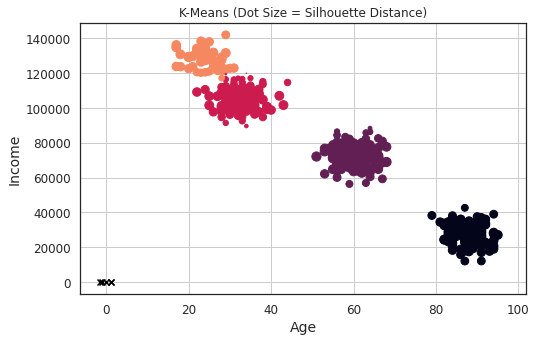

In [ ]:
plt.figure();
plt.scatter(df1['Age'], df1['Income'], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Age');
plt.ylabel('Income');

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



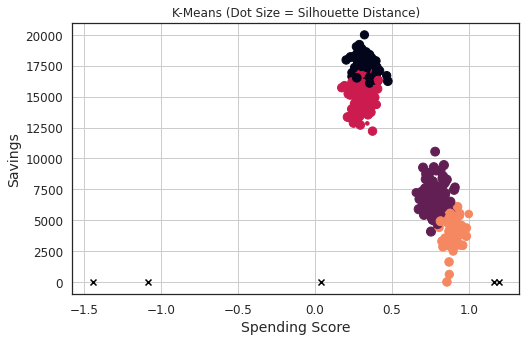

In [ ]:
plt.figure();
plt.scatter(df1['SpendingScore'], df1['Savings'], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Spending Score');
plt.ylabel('Savings');

In [ ]:
sample_silhouette_values = silhouette_samples(df1, k_means.labels_)

df1_tmp = df1.copy()
df1_tmp['Cluster ID'] = k_means.labels_

df1_tmp['Silhouette'] = sample_silhouette_values
df1_tmp = df1_tmp.sort_values(['Silhouette'])
df1_tmp.head()
df1_tmp.tail()

,Age,Income,SpendingScore,Savings,Cluster ID,Silhouette
368,84,110582,0.079049,14937.995170,4,-0.886288
81,84,114406,0.123838,16840.570584,0,-0.883621
312,88,114767,0.032208,17833.093470,0,-0.877010
10,85,111389,0.036795,16009.237763,4,-0.875668
147,86,128378,0.126083,13585.778624,4,-0.845473


,Age,Income,SpendingScore,Savings,Cluster ID,Silhouette
258,61,71171,0.721080,6457.790641,1,0.849918
469,63,70580,0.766509,7262.108723,1,0.849936
192,59,71302,0.702009,6595.726010,1,0.850137
478,65,70430,0.696994,6971.164886,1,0.850326
146,62,71050,0.735357,6988.197368,1,0.850631


In [ ]:
# Let's look at some example rows in each.
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print((df1[k_means.labels_==label].head()))


Cluster 0:
    Age  Income  SpendingScore       Savings
4    87   17760       0.348778  16869.507130
7    87   42592       0.355290  18086.287158
9    84   27693       0.367063  17879.558906
17   87   31481       0.317424  16180.688082
18   82   33636       0.371783  17866.833598

Cluster 1:
   Age  Income  SpendingScore      Savings
0   58   77769       0.791329  6559.829923
1   59   81799       0.791082  5417.661426
2   62   74751       0.702657  9258.992965
3   59   74373       0.765680  7346.334504
6   54   76500       0.785198  6878.884249

Cluster 2:
    Age  Income  SpendingScore       Savings
11   36   99780       0.265433  16398.401333
12   30   99949       0.344679  13621.639726
13   31  107963       0.290509  13407.081391
20   30  101073       0.314387  14324.555977
34   33  101058       0.315082  14911.868398

Cluster 3:
    Age  Income  SpendingScore      Savings
5    29  131578       0.847034  3535.514352
25   30  122788       0.872872  5706.149573
26   17  134966       

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



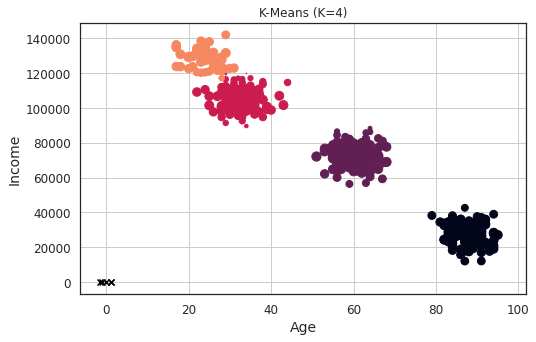

In [ ]:
plt.figure();
plt.scatter(df1['Age'], df1['Income'], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
plt.title("K-Means (K=4)");
plt.xlabel('Age');
plt.ylabel('Income');

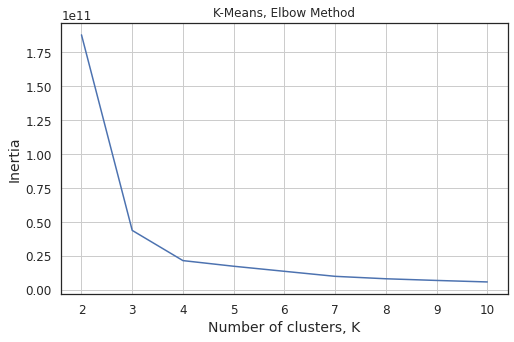

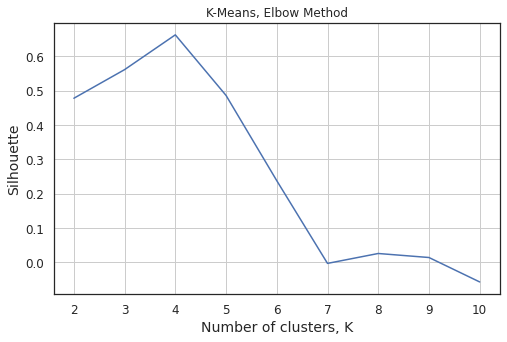

In [ ]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df1)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

## 1.2: Clustering Algorithm #2

In [ ]:
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(X)

DBSCAN(eps=0.3, min_samples=3)

In [ ]:
db.labels_

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  1,  3,  3,  3,  0,  1,  0,
        1,  1,  1,  3,  1,  0,  1,  1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        3,  0,  1,  0,  3,  3,  0,  1,  2,  0,  0,  2,  1,  2,  3,  0,  1,
        3,  2,  1,  0,  1,  3,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  3,  1,  1,  3,  0,  3,  0,  0,  2,  0,  1,  0,  1,  1,
        3,  3,  0,  0,  0,  0,  0,  2,  1,  0,  2,  3,  0,  0,  3,  3,  2,
        3,  2,  3,  1,  1,  3,  3,  0,  1,  3,  0,  3,  3,  3,  0,  3,  2,
        1,  3,  1,  1,  1,  3,  1,  0,  1,  0,  0,  3,  0,  3,  0,  2,  1,
        1,  2,  0,  3,  1,  0,  0,  2,  0,  2,  0,  1,  0,  1,  0,  3,  1,
        0,  1,  1,  3,  0,  1,  0,  3,  1,  0,  3,  1,  3,  1,  0,  3,  0,
        1,  0,  3,  0,  1,  0,  0,  1,  1,  1,  0,  0,  3,  2,  2,  1,  3,
        0,  0,  0,  3,  1,  0,  0,  0,  1,  2,  3,  1,  1,  1,  3,  0,  3,
        0,  3,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  3,  2,  3,  1,  0,
        0,  3,  1,  3,  2

In [ ]:

silhouette_score(df1, db.labels_)

0.5441247620312581

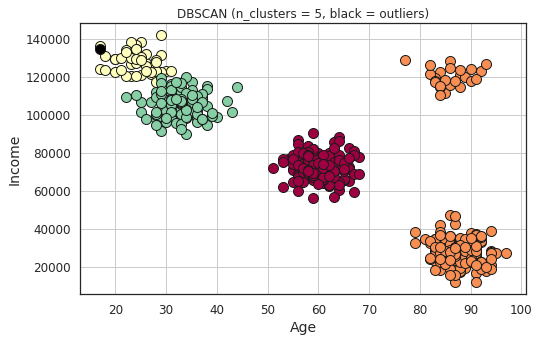

In [ ]:
plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = df1[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('Age');
plt.ylabel('Income');

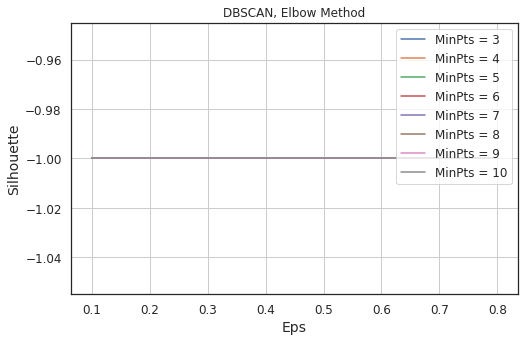

In [ ]:
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(df1)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(Xdf1, db.labels_, metric='euclidean')
    

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();
#plt.savefig('out/simple_dbscan_elbow');

## 1.3 Model Comparison

TODO: Delete this text and insert your answer here.

## 1.4 Personas

TODO: Delete this text and insert your answer here.

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

TODO: Delete this text and insert your answer here.

## 2.2: A rule that might have reasonably high support but low confidence.

TODO: Delete this text and insert your answer here.

## 2.3: A rule that might have low support and low confidence.

TODO: Delete this text and insert your answer here.

## 2.4: A rule that might have low support and high confidence.

TODO: Delete this text and insert your answer here.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [ ]:
print(df3);print(X_train);print(y_train)

           UserID Sex  PreviousDefault  ...              City    Purpose  DateOfBirth
0     218-84-8180   F                0  ...        Port Keith   Vacation   1964-04-07
1     395-49-9764   M                0  ...        Lake Debra     NewCar   1978-06-02
2     892-81-4890   F                0  ...  North Judithbury     NewCar   1972-03-18
3     081-11-7963   F                0  ...         Lake Chad      Other   1985-02-26
4     347-03-9639   M                0  ...  North Judithbury   Vacation   1983-08-08
...           ...  ..              ...  ...               ...        ...          ...
5995  290-91-5587   F                0  ...    East Jessetown     Repair   1968-08-25
5996  137-27-2025   M                0  ...          Lisatown     NewCar   1969-08-15
5997  061-50-0051   M                0  ...    New Roberttown  Education   1977-04-12
5998  239-62-7143   M                0  ...  North Judithbury     NewCar   1966-06-12
5999  367-72-7571   F                0  ...  North Jud

In [ ]:
#Check Null values
X_train.isna().sum()

UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



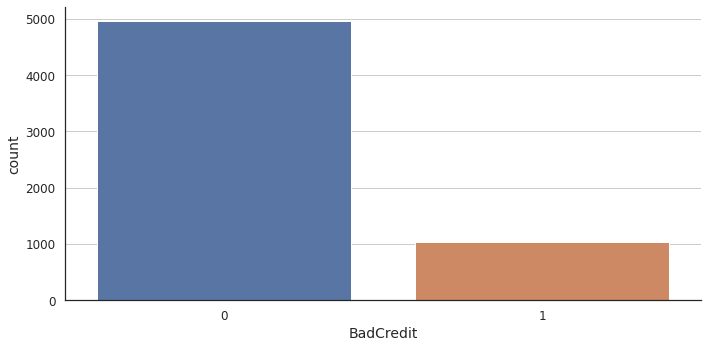

In [ ]:
#Traget variable plot
import seaborn as sns
sns.factorplot('BadCredit', data=df3, aspect=2, kind='count');

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f689f46cbd0>)

Text(0.5, 1.0, 'UserID')

Text(0.5, 1.0, 'Sex')

Text(0.5, 1.0, 'PreviousDefault')

Text(0.5, 1.0, 'FirstName')

Text(0.5, 1.0, 'LastName')

Text(0.5, 1.0, 'NumberPets')

Text(0.5, 1.0, 'PreviousAccounts')

Text(0.5, 1.0, 'ResidenceDuration')

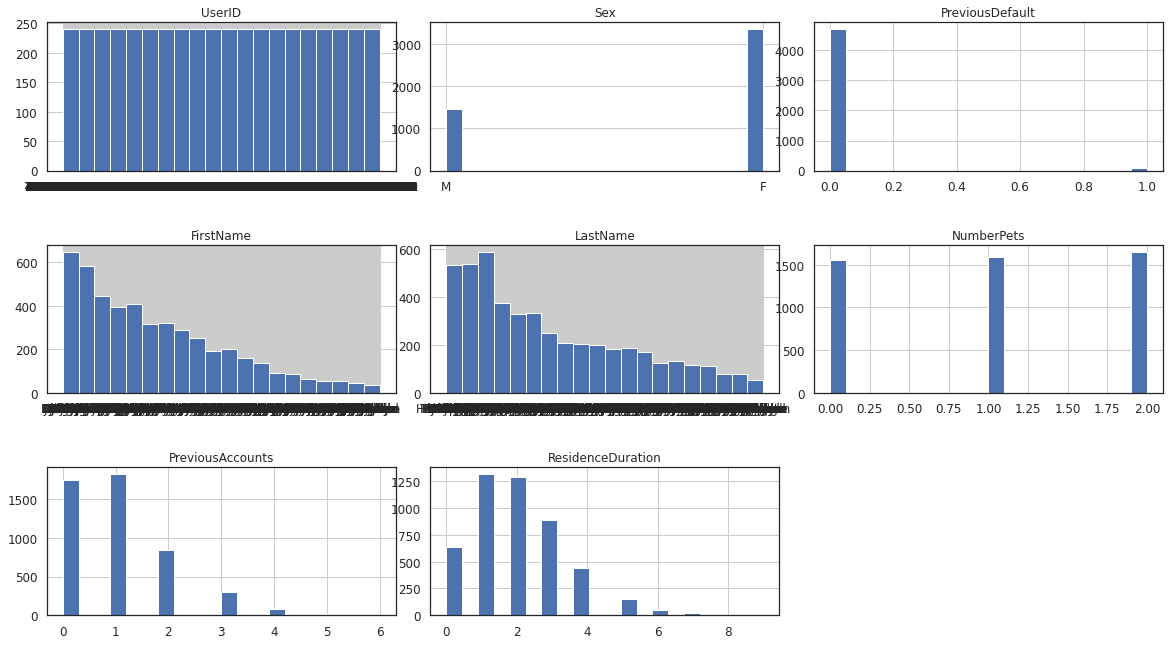

In [ ]:
# Histogram of each feature
import itertools

col = X_train.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    X_train[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [ ]:
for i in X_train.columns:
    print('{} - {}'.format(i,X_train[i].unique().shape[0]))

UserID - 4800
Sex - 2
PreviousDefault - 2
FirstName - 568
LastName - 907
NumberPets - 3
PreviousAccounts - 7
ResidenceDuration - 10
Street - 4800
LicensePlate - 4799
Amount - 1641
Married - 2
Duration - 6
City - 20
Purpose - 8
DateOfBirth - 3570


In [ ]:
bool_series = X_train.duplicated(keep=False)
print('Boolean series:')
print(bool_series.value_counts())
print('\n')
print('DataFrame after removing all the instances of the duplicate rows:')
# The `~` sign is used for negation. It changes the boolean value True to False and False to True
X_train[~bool_series]

Boolean series:
False    4800
dtype: int64


DataFrame after removing all the instances of the duplicate rows:


,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,888-92-1021,F,0,Carly,Tanner,0,1,1,99179 Erin Stravenue,98G XY9,3607,1,24,Robinsonshire,NewCar,1973-01-04
5191,875-64-1301,F,0,Jasmine,Chambers,2,1,0,368 Jackson Pass Suite 887,430M,3186,0,30,North Judithbury,NewCar,1973-12-25
5226,584-74-0175,F,0,Danielle,Hendrix,2,1,3,898 Kayla Manor Apt. 879,293 MHY,2387,1,36,Lake Roberto,Business,1969-02-25
5390,507-44-5910,F,0,Dana,Taylor,1,1,3,7343 Kimberly Flat,4JIY 37,3620,0,12,Lake Debra,Other,1967-01-09


In [ ]:
X_train.dtypes

UserID               object
Sex                  object
PreviousDefault       int64
FirstName            object
LastName             object
NumberPets            int64
PreviousAccounts      int64
ResidenceDuration     int64
Street               object
LicensePlate         object
Amount                int64
Married               int64
Duration              int64
City                 object
Purpose              object
DateOfBirth          object
dtype: object

In [ ]:
from datetime import datetime
X_train.DateOfBirth = pd.to_datetime(X_train.DateOfBirth, format='%Y-%m-%d')
X_train['year']  = X_train.DateOfBirth.dt.year
X_train['month'] = X_train.DateOfBirth.dt.month
X_train['day'] = X_train.DateOfBirth.dt.day

def Age(data):
  now = datetime.now().year
  data['Age'] = now- data['year']
  data['Age']=data['Age'].replace([2021],0)
  return data

X_train= Age(X_train)
X_train['DateOfBirth']=X_train['DateOfBirth'].apply(lambda x: x.toordinal())

X_train.dtypes

UserID               object
Sex                  object
PreviousDefault       int64
FirstName            object
LastName             object
NumberPets            int64
PreviousAccounts      int64
ResidenceDuration     int64
Street               object
LicensePlate         object
Amount                int64
Married               int64
Duration              int64
City                 object
Purpose              object
DateOfBirth           int64
year                  int64
month                 int64
day                   int64
Age                   int64
dtype: object

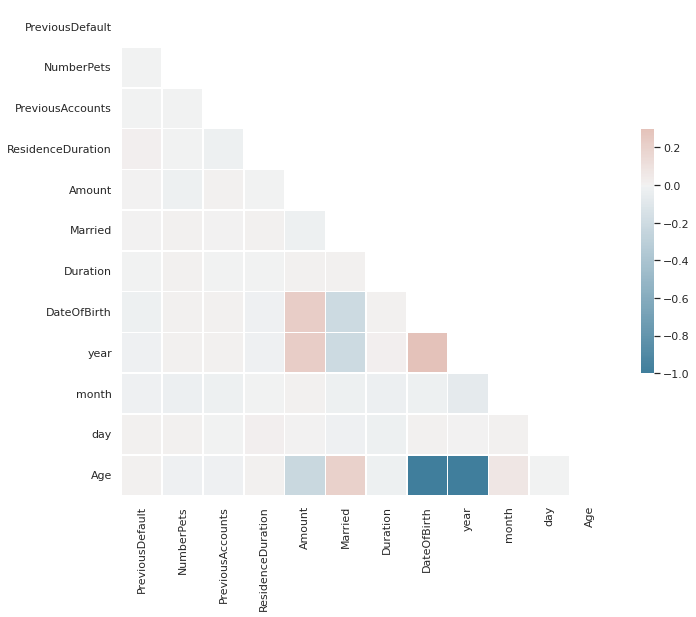

In [ ]:
from string import ascii_letters
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(80)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
X_train = X_train.drop(labels=['UserID','DateOfBirth', 'Street', 'LicensePlate','FirstName','LastName'], axis=1)


In [ ]:
feat = [x for x in X_train.columns]
for col in feat:
  print(X_train.groupby([col]).size())

Sex
F    3338
M    1462
dtype: int64
PreviousDefault
0    4703
1      97
dtype: int64
NumberPets
0    1552
1    1596
2    1652
dtype: int64
PreviousAccounts
0    1741
1    1822
2     837
3     301
4      76
5      16
6       7
dtype: int64
ResidenceDuration
0     641
1    1317
2    1287
3     886
4     441
5     155
6      49
7      19
8       4
9       1
dtype: int64
Amount
2158    1
2262    1
2266    1
2270    1
2319    1
       ..
4821    1
4825    1
4935    1
4964    1
4982    1
Length: 1641, dtype: int64
Married
0    2374
1    2426
dtype: int64
Duration
6      420
12     507
18     710
24     977
30    1165
36    1021
dtype: int64
City
Cassandraton         130
East Jessetown       341
East Jill            652
Ericmouth            155
Herrerafurt           96
Jacquelineland        56
Lake Chad             97
Lake Debra           278
Lake Roberto         164
Lisatown             169
New Jessica           67
New Kellystad         99
New Roberttown       467
North Judithbury    1319
N

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



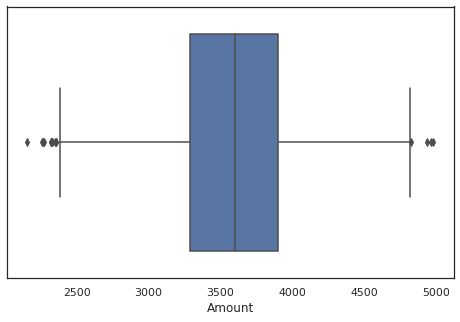

In [ ]:
sns.boxplot(X_train.Amount)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



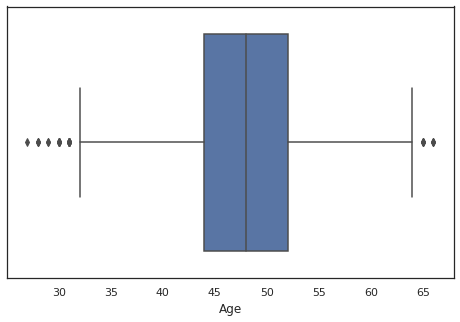

In [ ]:
sns.boxplot(X_train.Age)

In [ ]:
for x in X_train.columns:
  if X_train[x].dtype == 'object':
    X_train[x]= X_train[x].astype('category')

In [ ]:
y_b_train = pd.to_numeric(y_train)
!pip install category_encoders
from category_encoders import TargetEncoder

te = TargetEncoder()

def target_encoder(col, target):
    for i in range(len(X_train.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col

df_te_train = target_encoder(X_train, y_train)

In [ ]:
df_te_train

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,year,month,day,Age
3897,0.178523,0,2,0,2,3329,0,12,0.162741,0.146444,1970,4,22,51
5628,0.168664,0,0,2,2,2996,0,36,0.193548,0.146444,1964,6,19,57
1756,0.168664,0,2,0,3,2470,0,24,0.176380,0.182131,1975,2,17,46
2346,0.168664,0,2,1,2,3745,0,30,0.151079,0.169691,1977,2,16,44
2996,0.178523,0,0,1,3,3549,0,36,0.171342,0.154286,1976,7,27,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.168664,0,0,1,1,3607,1,24,0.170635,0.182131,1973,1,4,48
5191,0.168664,0,2,1,0,3186,0,30,0.171342,0.182131,1973,12,25,48
5226,0.168664,0,2,1,3,2387,1,36,0.189024,0.246377,1969,2,25,52
5390,0.168664,0,1,1,3,3620,0,12,0.151079,0.139189,1967,1,9,54


## 3.1: Baseline model

In [ ]:
# Models to be tested: L ogistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [ ]:
classifiers = {
    "RandomForest" : RandomForestClassifier(),
    "Light GBM" :  lgb.LGBMClassifier()
}

In [ ]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(df_te_train,y_train )
    train_score = round(classifier.score(df_te_train, y_train),2)
    train_scores.append(train_score)
 

print(train_scores)

RandomForestClassifier()

LGBMClassifier()

[1.0, 0.97]


In [ ]:
#Cross validation score

from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(df_te_train, y_train)
    train_score = cross_val_score(classifier, df_te_train, y_train, cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)

RandomForestClassifier()

LGBMClassifier()

[0.88, 0.87]


## 3.2: Feature engineering

In [ ]:
#Merge label and training set to handle outlier
train_df = pd.concat([X_train,y_train],axis=1)
train_df

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,year,month,day,Age,BadCredit
3897,0.178523,0,2,0,2,3329,0,12,0.162741,0.146444,1970,4,22,51,0
5628,0.168664,0,0,2,2,2996,0,36,0.193548,0.146444,1964,6,19,57,0
1756,0.168664,0,2,0,3,2470,0,24,0.176380,0.182131,1975,2,17,46,0
2346,0.168664,0,2,1,2,3745,0,30,0.151079,0.169691,1977,2,16,44,0
2996,0.178523,0,0,1,3,3549,0,36,0.171342,0.154286,1976,7,27,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.168664,0,0,1,1,3607,1,24,0.170635,0.182131,1973,1,4,48,0
5191,0.168664,0,2,1,0,3186,0,30,0.171342,0.182131,1973,12,25,48,0
5226,0.168664,0,2,1,3,2387,1,36,0.189024,0.246377,1969,2,25,52,0
5390,0.168664,0,1,1,3,3620,0,12,0.151079,0.139189,1967,1,9,54,0


In [ ]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(train_df.Amount)
train_df = train_df.loc[(train_df.Amount > lower) & (train_df.Amount < upper)]
lower1, upper1 = remove_outlier(train_df.Age)
train_df = train_df.loc[(train_df.Age > lower1) & (train_df.Age < upper1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



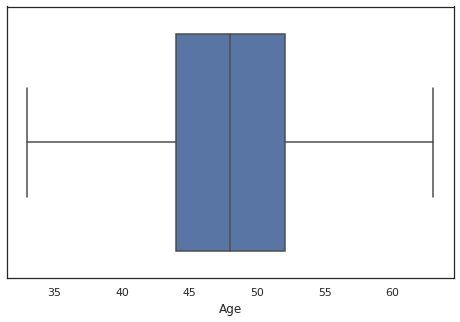

In [ ]:
sns.boxplot(train_df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



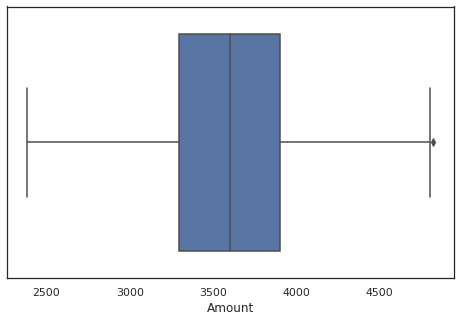

In [ ]:
sns.boxplot(train_df.Amount)


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f687b98ab10>)

Text(0.5, 1.0, 'Sex')

Text(0.5, 1.0, 'PreviousDefault')

Text(0.5, 1.0, 'NumberPets')

Text(0.5, 1.0, 'PreviousAccounts')

Text(0.5, 1.0, 'ResidenceDuration')

Text(0.5, 1.0, 'Amount')

Text(0.5, 1.0, 'Married')

Text(0.5, 1.0, 'Duration')

Text(0.5, 1.0, 'City')

Text(0.5, 1.0, 'Purpose')

Text(0.5, 1.0, 'year')

Text(0.5, 1.0, 'month')

Text(0.5, 1.0, 'day')

Text(0.5, 1.0, 'Age')

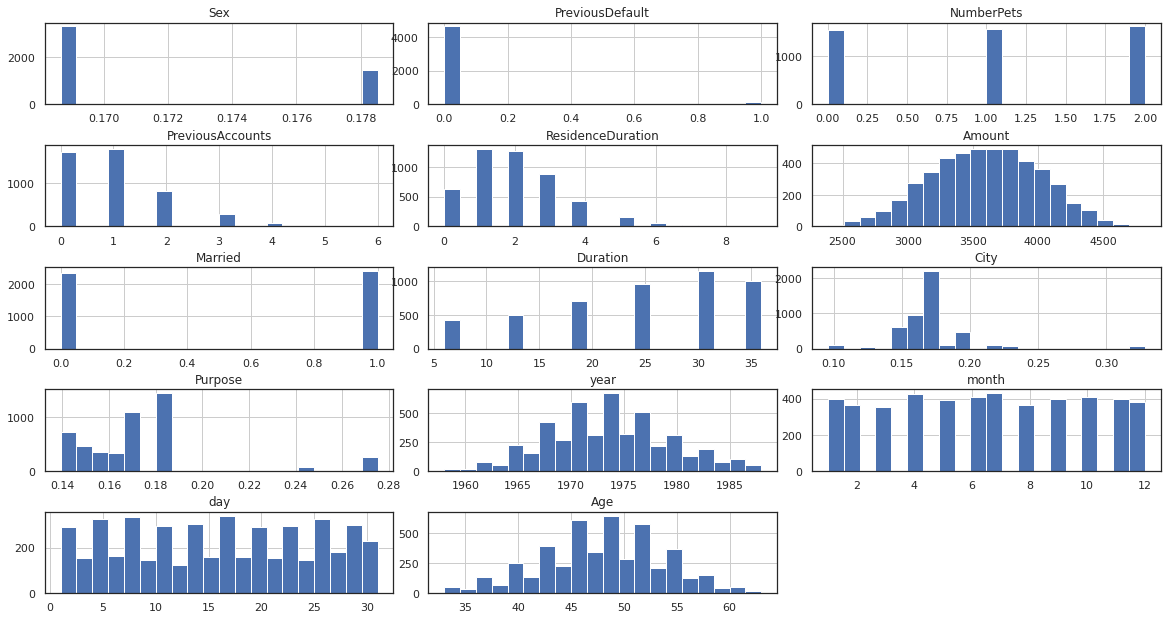

In [ ]:
import matplotlib.pyplot as plt
# Histogram of each feature
import itertools

col = train_df.columns[:14]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    train_df[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [ ]:
train_df['age_binned'] = pd.qcut(train_df.Age, q=[0, .25, .50, .75, 1])
train_df['amt_binned'] = pd.qcut(train_df.Amount, q=[0, .25, .50, .75, 1])
train_df['year_binned'] = pd.qcut(train_df.year, q=[0, .25, .50, .75, 1])
train_df['day_binned'] = pd.qcut(train_df.day, q=[0, .25, .50, .75, 1])
train_df['month_binned'] = pd.qcut(train_df.month, q=[0, .25, .50, .75, 1])

train_df.drop(columns=['Age', 'Amount', 'year','day','month'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train_df['Age']= le.fit_transform(train_df['age_binned'])
train_df['amount']= le.fit_transform(train_df['amt_binned'])
train_df['year']= le.fit_transform(train_df['year_binned'])
train_df['day']= le.fit_transform(train_df['day_binned'])
train_df['month']= le.fit_transform(train_df['month_binned'])

In [ ]:
train_df.drop(columns=['age_binned','amt_binned','year_binned','day_binned','month_binned'],inplace=True)

In [ ]:
from sklearn.preprocessing import RobustScaler

Scaled = pd.DataFrame(RobustScaler().fit_transform(train_df), columns=train_df.columns)
Scaled

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Married,Duration,City,Purpose,BadCredit,Age,amount,year,day,month
0,1.0,0.0,0.5,-0.5,0.0,-1.0,-1.0,-0.569980,-0.651439,0.0,0.5,0.0,0.0,0.5,-0.5
1,0.0,0.0,-0.5,0.5,0.0,-1.0,1.0,1.471597,-0.651439,0.0,1.0,-0.8,-0.5,0.5,0.0
2,0.0,0.0,0.5,-0.5,0.5,-1.0,0.0,0.333892,0.348561,0.0,0.0,-0.8,0.5,0.5,-0.5
3,0.0,0.0,0.5,0.0,0.0,-1.0,0.5,-1.342792,0.000000,0.0,-0.5,0.8,0.5,0.0,-0.5
4,1.0,0.0,-0.5,0.0,0.5,-1.0,1.0,0.000000,-0.431690,0.0,0.0,0.0,0.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,0.0,0.0,-0.5,0.0,-0.5,0.0,0.0,-0.046852,0.348561,0.0,0.0,0.8,0.0,-0.5,-0.5
4728,0.0,0.0,0.5,0.0,-1.0,-1.0,0.5,0.000000,0.348561,0.0,0.0,-0.8,0.0,1.0,1.0
4729,0.0,0.0,0.5,0.0,0.5,0.0,1.0,1.171797,2.148827,0.0,0.5,-0.8,-0.5,1.0,-0.5
4730,0.0,0.0,0.0,0.0,0.5,-1.0,-1.0,-1.342792,-0.854715,0.0,1.0,0.8,-0.5,0.0,-0.5


In [ ]:
a_target_0 = train_df[train_df.BadCredit == 0].BadCredit.count() / train_df.BadCredit.count()
a_target_1 = train_df[train_df.BadCredit == 1].BadCredit.count() / train_df.BadCredit.count()

print(a_target_0)
print(a_target_1)

0.8328402366863905
0.16715976331360946


In [ ]:
a = Scaled.loc[:, Scaled.columns != 'BadCredit']
b = Scaled.loc[:, Scaled.columns == 'BadCredit']

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

a_over,b_over = oversample.fit_resample(a,b)

In [ ]:
a_target_0 = b_over[b_over.BadCredit == 0].BadCredit.count() / b_over.BadCredit.count()
a_target_1 = b_over[b_over.BadCredit == 1].BadCredit.count() / b_over.BadCredit.count()

print(a_target_0)
print(a_target_1)

0.5
0.5


Sex                -0.021638
NumberPets         -0.014624
month              -0.012898
PreviousAccounts   -0.006846
City                0.078721
Duration            0.086050
Purpose             0.112645
year                0.601689
amount              0.610599
BadCredit           1.000000
Name: BadCredit, dtype: float64


<Figure size 1440x1440 with 0 Axes>

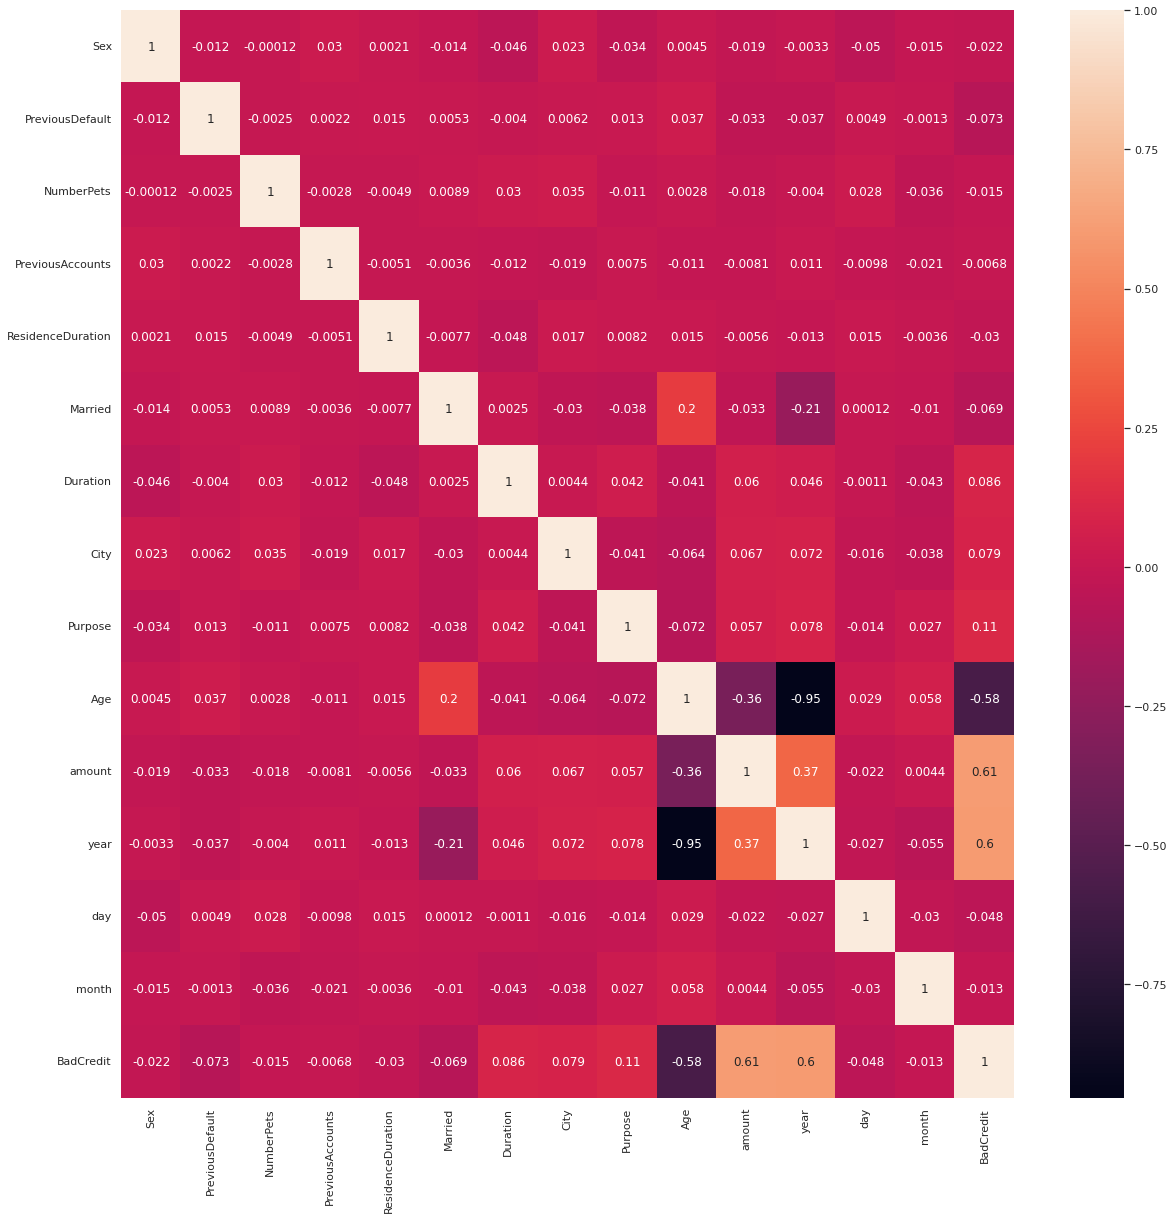

In [ ]:
train = pd.concat([a_over,b_over],axis=1)
cm_b = train.corr()

print(cm_b.BadCredit.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_b, xticklabels=train.columns, yticklabels=train.columns,annot=True)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
#pca_test = PCA(n_components=14)
#pca_test.fit(a_over)
#sns.set(style='whitegrid')
#plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')
#plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
#display(plt.show())
#evr = pca_test.explained_variance_ratio_
#cvr = np.cumsum(pca_test.explained_variance_ratio_)
#pca_df = pd.DataFrame()
#pca_df['Cumulative Variance Ratio'] = cvr
#pca_df['Explained Variance Ratio'] = evr
#display(pca_df.head(10))

In [ ]:
#pca = PCA(n_components=10)
#pca.fit(a_over)
#X_train_scaled_pca = pca.transform(a_over)



In [ ]:
b_over

,BadCredit
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
7877,1.0
7878,1.0
7879,1.0
7880,1.0


In [ ]:
train_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(a_over, b_over['BadCredit'])
    train_score = cross_val_score(classifier, a_over, b_over['BadCredit'], cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)

RandomForestClassifier()

LGBMClassifier()

[0.92, 0.85]


## 3.3: Feature selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_train_new=selector.fit_transform(a_over)



In [ ]:
train_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_new, b_over['BadCredit'])
    train_score = cross_val_score(classifier, X_train_new, b_over['BadCredit'], cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)

RandomForestClassifier()

LGBMClassifier()

[0.92, 0.85]


## 3.4: Hyperparameter tuning

In [ ]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
     "LGBM" :  lgb.LGBMClassifier()

}

In [ ]:
#Cross validation score

from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(a_over, b_over['BadCredit'])
    train_score = cross_val_score(classifier, X_train_new, b_over['BadCredit'], cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)


LogisticRegression()

KNeighborsClassifier()

SVC()

DecisionTreeClassifier()

RandomForestClassifier()

LGBMClassifier()

[0.87, 0.88, 0.88, 0.88, 0.92, 0.85]


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
!pip install optuna
import optuna



In [ ]:
def objective(trial):
  xtrain = X_train_new
  ytrain = b_over['BadCredit']
  n_estimators = trial.suggest_int('n_estimators', 2, 20)
  max_depth = int(trial.suggest_loguniform('max_depth', 1, 50))
  min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
  criterion = 'entropy'
  clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,criterion=criterion)
  
  score = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1_weighted")
  F1_mean = score.mean()

  return F1_mean
  



In [ ]:
import sklearn
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2021-12-05 01:06:43,858] A new study created in memory with name: no-name-766ee86e-3093-48af-bfcb-ebe9ffa2d4ea
[I 2021-12-05 01:06:43,933] Trial 0 finished with value: 0.7505591573700914 and parameters: {'n_estimators': 2, 'max_depth': 1.8967497782127394, 'min_samples_split': 13}. Best is trial 0 with value: 0.7505591573700914.
[I 2021-12-05 01:06:44,237] Trial 1 finished with value: 0.8680610702169449 and parameters: {'n_estimators': 10, 'max_depth': 22.450311891995604, 'min_samples_split': 4}. Best is trial 1 with value: 0.8680610702169449.
[I 2021-12-05 01:06:44,436] Trial 2 finished with value: 0.8637925352178755 and parameters: {'n_estimators': 6, 'max_depth': 25.483201912544512, 'min_samples_split': 8}. Best is trial 1 with value: 0.8680610702169449.
[I 2021-12-05 01:06:44,583] Trial 3 finished with value: 0.8546857377182796 and parameters: {'n_estimators': 4, 'max_depth': 48.09797254561672, 'min_samples_split': 3}. Best is trial 1 with value: 0.8680610702169449.
[I 2021-12-05

In [ ]:
trial = study.best_trial
print('F1_Score: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

F1_Score: 0.8801415448680399
Best hyperparameters: {'n_estimators': 17, 'max_depth': 12.985263125028576, 'min_samples_split': 10}


In [ ]:
from sklearn import svm

# defining parameter range
svc_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
 
grid_svc = GridSearchCV(svm.SVC(), svc_params,cv=5, scoring='f1_weighted').fit(X_train_new, b_over['BadCredit'])
 


In [ ]:
X_test.DateOfBirth = pd.to_datetime(X_test.DateOfBirth, format='%Y-%m-%d')
X_test['year']  = X_test.DateOfBirth.dt.year
X_test['month'] = X_test.DateOfBirth.dt.month
X_test['day'] = X_test.DateOfBirth.dt.day

def Age(data):
  now = datetime.now().year
  data['Age'] = now- data['year']
  data['Age']=data['Age'].replace([2021],0)
  return data

X_test= Age(X_test)
X_test['DateOfBirth']=X_test['DateOfBirth'].apply(lambda x: x.toordinal())

X_test = X_test.drop(labels=['UserID','DateOfBirth', 'Street', 'LicensePlate','FirstName','LastName'], axis=1)

for x in X_test.columns:
  if X_test[x].dtype == 'object':
    X_test[x]= X_test[x].astype('category')


y_b_test = pd.to_numeric(y_test)

def target_encoder(col, target):
    for i in range(len(X_test.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col

df_te_train = target_encoder(X_test, y_test)



In [ ]:
test_df = pd.concat([df_te_train,y_test],axis=1)

test_df['age_binned'] = pd.qcut(test_df.Age, q=[0, .25, .50, .75, 1])
test_df['amt_binned'] = pd.qcut(test_df.Amount, q=[0, .25, .50, .75, 1])
test_df['year_binned'] = pd.qcut(test_df.year, q=[0, .25, .50, .75, 1])
test_df['day_binned'] = pd.qcut(test_df.day, q=[0, .25, .50, .75, 1])
test_df['month_binned'] = pd.qcut(test_df.month, q=[0, .25, .50, .75, 1])

test_df.drop(columns=['Age', 'Amount', 'year','day','month'], inplace=True)

test_df['Age']= le.fit_transform(test_df['age_binned'])
test_df['amount']= le.fit_transform(test_df['amt_binned'])
test_df['year']= le.fit_transform(test_df['year_binned'])
test_df['day']= le.fit_transform(test_df['day_binned'])
test_df['month']= le.fit_transform(test_df['month_binned'])

test_df.drop(columns=['age_binned','amt_binned','year_binned','day_binned','month_binned'],inplace=True)

In [ ]:
Scaled = pd.DataFrame(RobustScaler().fit_transform(test_df), columns=test_df.columns)

c = Scaled.loc[:, Scaled.columns != 'BadCredit']
d = Scaled.loc[:, Scaled.columns == 'BadCredit']

c_over,d_over = oversample.fit_resample(c,d)

#pca.fit(c)
#X_test_scaled_pca = pca.transform(c)
X_test_new=selector.fit_transform(c_over)



In [ ]:
#Create an instance with tuned hyperparameters
optimised_rf = RandomForestClassifier( criterion = 'entropy',
                                     max_depth = study.best_params['max_depth'],
                                     n_estimators = study.best_params['n_estimators'],min_samples_split = study.best_params['min_samples_split'],
                                     n_jobs=2)
#learn
optimised_rf.fit(X_train_new ,b_over['BadCredit'])

y_pred = optimised_rf.predict(X_test_new)

RandomForestClassifier(criterion='entropy', max_depth=12.985263125028576,
                       min_samples_split=10, n_estimators=17, n_jobs=2)

In [ ]:
LGBM = lgb.LGBMClassifier()
LGBM.fit(X_train_new, b_over['BadCredit'])
y_pred_lgb = LGBM.predict(X_test_new)

LGBMClassifier()

In [ ]:
y_pred_svc = grid_svc.predict(X_test_new)

## 3.5: Performance estimation

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('RFM Test test set Accuracy: ', metrics.accuracy_score(d_over, y_pred))
print('LGBM Test test set Accuracy: ', metrics.accuracy_score(d_over, y_pred_lgb))
print('SVC Test set Accuracy: ', metrics.accuracy_score(d_over,y_pred_svc))

print('RFM test set F1 score: ', metrics.f1_score(d_over, y_pred,average='weighted'))
print('LGBM test set F1 score: ', metrics.f1_score(d_over, y_pred_lgb,average='weighted'))
print('SVC Test set F1 score: ', metrics.f1_score(d_over,y_pred_svc,average='weighted'))

print('RFM test set classification report: ')
print(classification_report(d_over, y_pred))
print('LGBM test set classification report: ')
print(classification_report(d_over, y_pred_lgb))
print('SVC test set classification report: ')
print(classification_report(d_over, y_pred_svc))



RFM Test test set Accuracy:  0.8935418768920282
LGBM Test test set Accuracy:  0.8365287588294652
SVC Test set Accuracy:  0.6160443995963673
RFM test set F1 score:  0.8933809572977734
LGBM test set F1 score:  0.8330525606469003
SVC Test set F1 score:  0.558601609142726
RFM test set classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       991
         1.0       0.87      0.93      0.90       991

    accuracy                           0.89      1982
   macro avg       0.90      0.89      0.89      1982
weighted avg       0.90      0.89      0.89      1982

LGBM test set classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81       991
         1.0       0.76      0.98      0.86       991

    accuracy                           0.84      1982
   macro avg       0.87      0.84      0.83      1982
weighted avg       0.87      0.84      0.83      1982

SV

In [ ]:
d_over

,BadCredit
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1977,1.0
1978,1.0
1979,1.0
1980,1.0


(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f687ae4a850>)

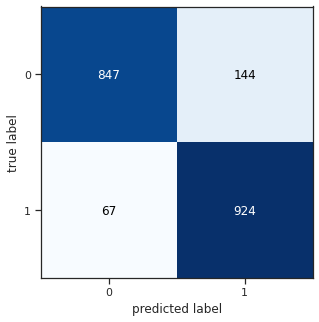

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
cm_rfm = confusion_matrix(d_over['BadCredit'], y_pred.flatten())
plot_confusion_matrix(cm_rfm)
plt.show()

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f687ae16750>)

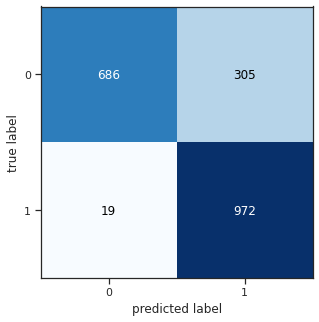

In [ ]:
cm_lgb = confusion_matrix(d_over['BadCredit'], y_pred_lgb.flatten())
plot_confusion_matrix(cm_lgb)
plt.show()

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f687ae16690>)

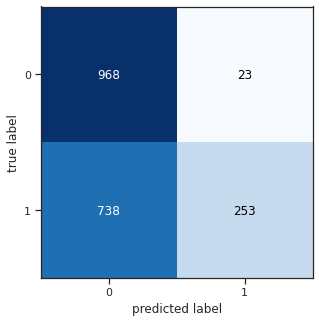

In [ ]:
cm_svc = confusion_matrix(d_over['BadCredit'], y_pred_svc.flatten())
plot_confusion_matrix(cm_svc)
plt.show()

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



TODO: Delete this text and insert your answer here.